<a href="https://colab.research.google.com/github/nickklos10/Concrete-Crack-Prediction-CV/blob/main/AI_CS_Concrete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install skillsnetwork

In [ ]:
from PIL import Image
from matplotlib.pyplot import imshow
import pandas
import matplotlib.pylab as plt
import os
import glob
import skillsnetwork

In [ ]:
def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + data_sample[1])

In [ ]:
await skillsnetwork.prepare("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/concrete_crack_images_for_classification.zip", path = "/content/data", overwrite=True)

  0%|          | 0/40000 [00:00<?, ?it/s]

Saved to 'data'


In [ ]:
directory="/content/data"

In [ ]:
negative='Negative'

In [ ]:
negative_file_path=os.path.join(directory,negative)
negative_file_path

'/content/data/Negative'

In [ ]:
os.listdir(negative_file_path)[0:3]

['08376.jpg', '12987.jpg', '07068.jpg']

In [ ]:
[os.path.join(negative_file_path,file) for file in  os.listdir(negative_file_path)][0:3]

['/content/data/Negative/08376.jpg',
 '/content/data/Negative/12987.jpg',
 '/content/data/Negative/07068.jpg']

In [ ]:
print("test.jpg".endswith(".jpg"))
print("test.mpg".endswith(".jpg"))

True
False


In [ ]:
negative_files=[os.path.join(negative_file_path,file) for file in  os.listdir(negative_file_path) if file.endswith(".jpg")]
negative_files.sort()
negative_files[0:3]

['/content/data/Negative/00001.jpg',
 '/content/data/Negative/00002.jpg',
 '/content/data/Negative/00003.jpg']

In [ ]:
positive="Positive"

In [ ]:
positive_file_path = os.path.join(directory, positive)

positive_files = [os.path.join(positive_file_path, file) for file in os.listdir(positive_file_path) if file.endswith(".jpg")]

positive_files.sort()
positive_files[0:3]

['/content/data/Positive/00001.jpg',
 '/content/data/Positive/00002.jpg',
 '/content/data/Positive/00003.jpg']

In [ ]:
image1 = Image.open(negative_files[0])

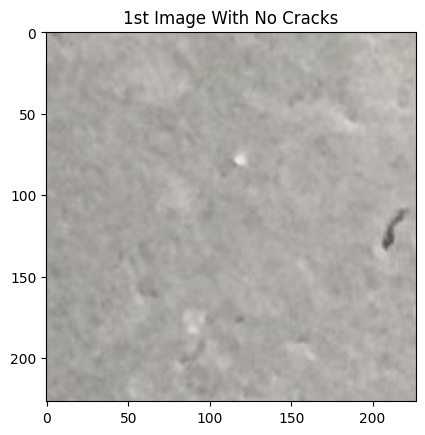

In [ ]:
plt.imshow(image1)
plt.title("1st Image With No Cracks")
plt.show()

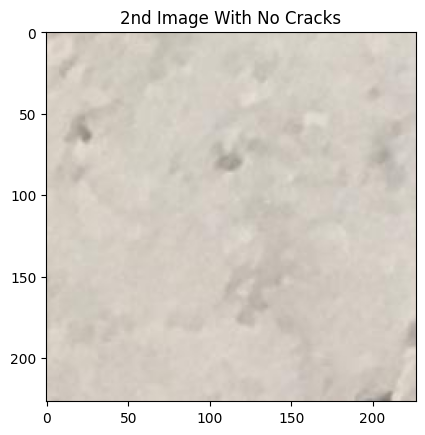

In [ ]:
image2 = Image.open(negative_files[1])
plt.imshow(image2)
plt.title("2nd Image With No Cracks")
plt.show()

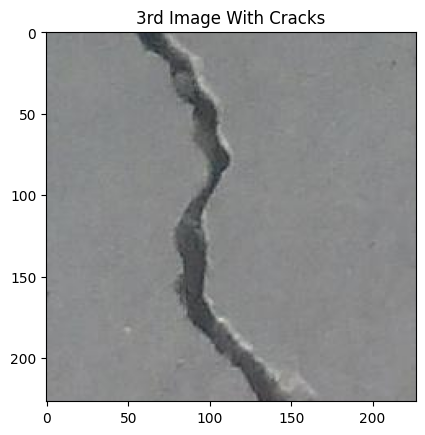

In [ ]:
image3 = Image.open(positive_files[2])
plt.imshow(image3)
plt.title("3rd Image With Cracks")
plt.show()

In [ ]:
number_of_samples = len(positive_files) + len(negative_files)

print("Total number of samples:", number_of_samples)

Total number of samples: 40000


In [ ]:
import torch
Y=torch.zeros([number_of_samples])

In [ ]:
Y=Y.type(torch.LongTensor)
Y.type()

'torch.LongTensor'

In [ ]:
Y[::2]=1
Y[1::2]=0

In [ ]:
all_files = []

min_length = min(len(positive_files), len(negative_files))

for i in range(min_length):
    all_files.append(positive_files[i])
    all_files.append(negative_files[i])

all_files.extend(positive_files[min_length:])
all_files.extend(negative_files[min_length:])

print("First four samples:")
print(all_files[:4])

First four samples:
['/content/data/Positive/00001.jpg', '/content/data/Negative/00001.jpg', '/content/data/Positive/00002.jpg', '/content/data/Negative/00002.jpg']


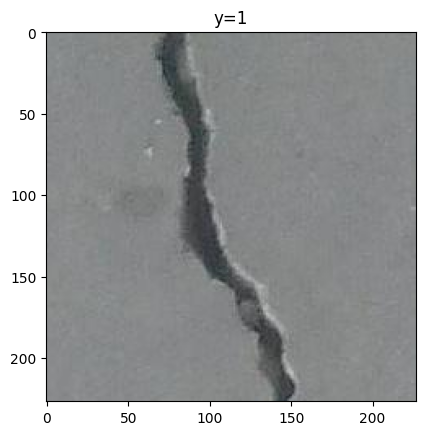

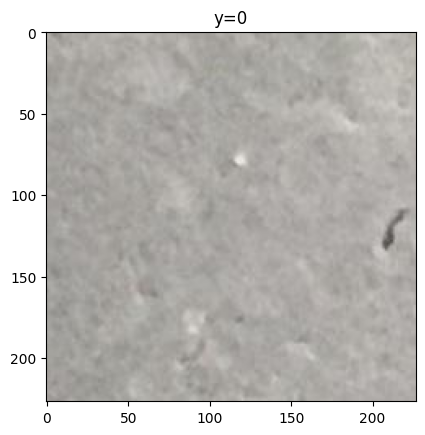

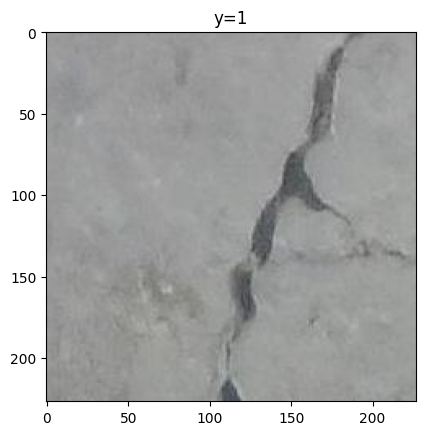

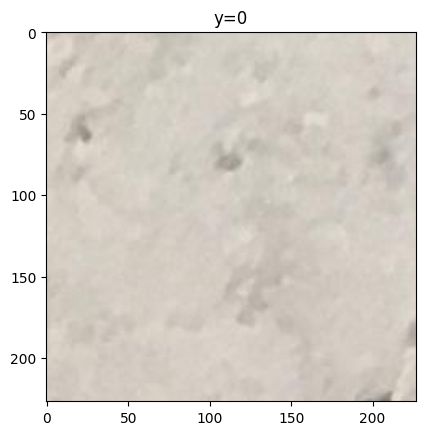

In [ ]:
for y,file in zip(Y, all_files[0:4]):
    plt.imshow(Image.open(file))
    plt.title("y="+str(y.item()))
    plt.show()

In [ ]:
train=False

if train:
    all_files=all_files[0:30000]
    Y=Y[0:30000]

else:
    all_files=all_files[30000:]
    Y=Y[30000:]

In [ ]:
split_point = 30000

if train:
    all_files = all_files[:split_point]
    Y = Y[:split_point]
else:
    all_files = all_files[split_point:]
    Y = Y[split_point:]

for y, file in zip(Y[:4], all_files[:4]):
    plt.imshow(Image.open(file))
    plt.title("y=" + str(y.item()))
    plt.show()

In [ ]:
from torch.utils.data import Dataset
from PIL import Image
import os
import torch

class Dataset(Dataset):
    def __init__(self, transform=None, train=True):
        directory = "/content/data"
        positive = "Positive"
        negative = "Negative"

        positive_file_path = os.path.join(directory, positive)
        negative_file_path = os.path.join(directory, negative)

        positive_files = [os.path.join(positive_file_path, file) for file in os.listdir(positive_file_path) if file.endswith(".jpg")]
        negative_files = [os.path.join(negative_file_path, file) for file in os.listdir(negative_file_path) if file.endswith(".jpg")]

        positive_files.sort()
        negative_files.sort()

        number_of_samples = len(positive_files) + len(negative_files)

        self.all_files = [None] * number_of_samples
        self.all_files[::2] = positive_files
        self.all_files[1::2] = negative_files

        self.Y = torch.zeros([number_of_samples]).type(torch.LongTensor)
        self.Y[::2] = 1
        self.Y[1::2] = 0

        if train:
            self.all_files = self.all_files[:30000]
            self.Y = self.Y[:30000]
        else:
            self.all_files = self.all_files[30000:]
            self.Y = self.Y[30000:]

        self.len = len(self.all_files)
        self.transform = transform

    def __len__(self):
        return self.len

    def __getitem__(self, idx):
        image = Image.open(self.all_files[idx])
        y = self.Y[idx]

        if self.transform:
            image = self.transform(image)

        return image, y


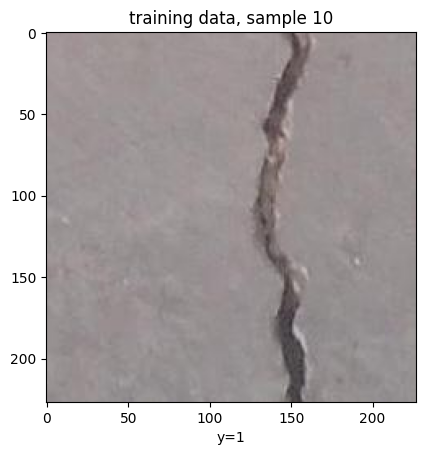

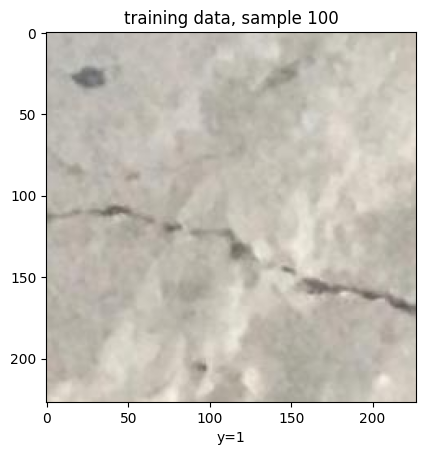

In [ ]:
dataset = Dataset(train=True)

samples = [10, 100]

for sample in samples:
    plt.imshow(dataset[sample][0])
    plt.xlabel("y=" + str(dataset[sample][1].item()))
    plt.title("training data, sample {}".format(int(sample)))
    plt.show()

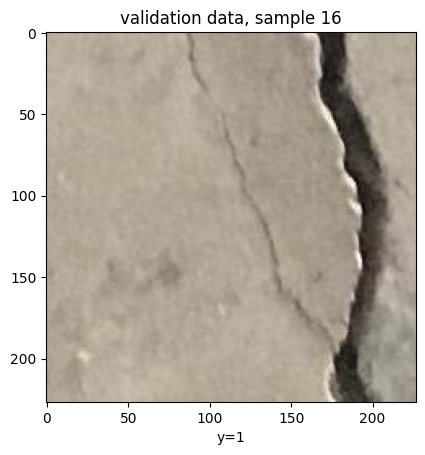

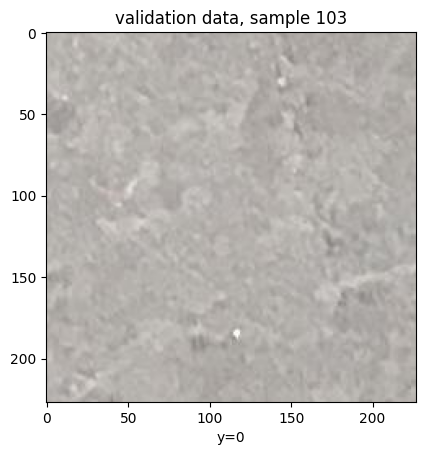

In [ ]:
dataset = Dataset(train=False)

samples = [16, 103]

for sample in samples:
    plt.imshow(dataset[sample][0])
    plt.xlabel("y=" + str(dataset[sample][1].item()))
    plt.title("validation data, sample {}".format(int(sample)))
    plt.show()

In [ ]:
import torchvision.transforms as transforms

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
transforms.ToTensor()
transforms.Normalize(mean, std)
transforms.Compose([])

transform =transforms.Compose([ transforms.ToTensor(), transforms.Normalize(mean, std)])

In [ ]:
dataset_train=Dataset(transform=transform,train=True)
dataset_val=Dataset(transform=transform,train=False)

In [ ]:
dataset_train[0][0].shape

torch.Size([3, 227, 227])

In [ ]:
size_of_image=3*227*227
size_of_image

154587

In [ ]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, size_of_image):
        super(Model, self).__init__()
        self.fc = nn.Linear(size_of_image, 2)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc(x)
        x = self.softmax(x)
        return x

model = Model(size_of_image)

In [ ]:
from torch.utils.data import DataLoader

torch.manual_seed(0)

class Model(nn.Module):
    def __init__(self, size_of_image):
        super(Model, self).__init__()
        self.fc = nn.Linear(size_of_image, 2)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc(x)
        x = self.softmax(x)
        return x

model = Model(size_of_image)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.1)
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])
train_dataset = Dataset(transform=transform, train=True)
val_dataset = Dataset(transform=transform, train=False)
train_loader = DataLoader(dataset=train_dataset, batch_size=5, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=5, shuffle=False)
max_val_accuracy = 0
for epoch in range(5):
    model.train()
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    if accuracy > max_val_accuracy:
        max_val_accuracy = accuracy
print(max_val_accuracy)

0.5


In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.1)

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))
])

train_dataset = Dataset(transform=transform, train=True)
val_dataset = Dataset(transform=transform, train=False)

train_loader = DataLoader(dataset=train_dataset, batch_size=5, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=5, shuffle=False)

In [ ]:
import torchvision.models as models
from PIL import Image
import pandas
import time
from torch.utils.data import Dataset, DataLoader
import h5py
import os
import glob
torch.manual_seed(0)

# Module 4

In [ ]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Positive_tensors.zip

--2024-10-24 15:05:03--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Positive_tensors.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2598656062 (2.4G) [application/zip]
Saving to: ‘Positive_tensors.zip.1’

Positive_tensors.zi 100%[===================>]   2.42G  27.0MB/s    in 91s     

2024-10-24 15:06:35 (27.3 MB/s) - ‘Positive_tensors.zip.1’ saved [2598656062/2598656062]



In [ ]:
!unzip -q Positive_tensors.zip

replace Positive_tensors/5114.pt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace Positive_tensors/17137.pt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace Positive_tensors/10854.pt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
! wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Negative_tensors.zip
!unzip -q Negative_tensors.zip

--2024-10-24 15:11:11--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Negative_tensors.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2111408108 (2.0G) [application/zip]
Saving to: ‘Negative_tensors.zip.1’

Negative_tensors.zi 100%[===================>]   1.97G  29.5MB/s    in 70s     

2024-10-24 15:12:22 (28.7 MB/s) - ‘Negative_tensors.zip.1’ saved [2111408108/2111408108]

replace Negative_tensors/5114.pt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
class Dataset(Dataset):

    # Constructor
    def __init__(self,transform=None,train=True):
        directory="/content/"
        positive="Positive_tensors"
        negative='Negative_tensors'

        positive_file_path=os.path.join(directory,positive)
        negative_file_path=os.path.join(directory,negative)
        positive_files=[os.path.join(positive_file_path,file) for file in os.listdir(positive_file_path) if file.endswith(".pt")]
        negative_files=[os.path.join(negative_file_path,file) for file in os.listdir(negative_file_path) if file.endswith(".pt")]
        number_of_samples=len(positive_files)+len(negative_files)
        self.all_files=[None]*number_of_samples
        self.all_files[::2]=positive_files
        self.all_files[1::2]=negative_files
        # The transform is goint to be used on image
        self.transform = transform
        #torch.LongTensor
        self.Y=torch.zeros([number_of_samples]).type(torch.LongTensor)
        self.Y[::2]=1
        self.Y[1::2]=0

        if train:
            self.all_files=self.all_files[0:30000]
            self.Y=self.Y[0:30000]
            self.len=len(self.all_files)
        else:
            self.all_files=self.all_files[30000:]
            self.Y=self.Y[30000:]
            self.len=len(self.all_files)

    # Get the length
    def __len__(self):
        return self.len

    # Getter
    def __getitem__(self, idx):

        image=torch.load(self.all_files[idx])
        y=self.Y[idx]

        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y

print("done")

done


In [ ]:
train_dataset = Dataset(train=True)
validation_dataset = Dataset(train=False)
print("done")

done


In [ ]:
import torchvision.models as models

model = models.resnet18(pretrained=True)

In [ ]:
for param in model.parameters():
    param.requires_grad = False

In [ ]:
model.fc = nn.Linear(in_features=512, out_features=2)

In [ ]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
train_loader = DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
validation_loader = DataLoader(dataset=validation_dataset, batch_size=100, shuffle=False)

print("DataLoaders created with batch size 100.")

DataLoaders created with batch size 100.


In [ ]:
optimizer = torch.optim.Adam([parameters  for parameters in model.parameters() if parameters.requires_grad],lr=0.001)

In [ ]:
import time

n_epochs = 1
loss_list = []
accuracy_list = []
correct = 0
N_test = len(validation_dataset)
N_train = len(train_dataset)
start_time = time.time()

for epoch in range(n_epochs):
    model.train()
    for x, y in train_loader:
        # Clear gradients
        optimizer.zero_grad()

        # Make a prediction
        outputs = model(x)

        # Calculate loss
        loss = criterion(outputs, y)

        # Calculate gradients of parameters
        loss.backward()

        # Update parameters
        optimizer.step()

        # Append loss to the loss list
        loss_list.append(loss.item())

    correct = 0
    model.eval()
    with torch.no_grad():
        for x_test, y_test in validation_loader:
            # Make a prediction
            outputs = model(x_test)

            # Find max
            _, predicted = torch.max(outputs, 1)

            # Calculate correctly classified samples in mini-batch
            correct += (predicted == y_test).sum().item()

    # Calculate accuracy
    accuracy = correct / N_test
    accuracy_list.append(accuracy)
    print(f"Epoch {epoch+1}: Validation Accuracy = {accuracy:.4f}")

end_time = time.time()
print(f"Training and validation completed in {end_time - start_time:.2f} seconds.")

<ipython-input-94-5bf0d761ed93>:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  image=torch.load(self.all_files[idx])


Epoch 1: Validation Accuracy = 0.9936
Training and validation completed in 3450.90 seconds.


In [ ]:
accuracy

0.9936

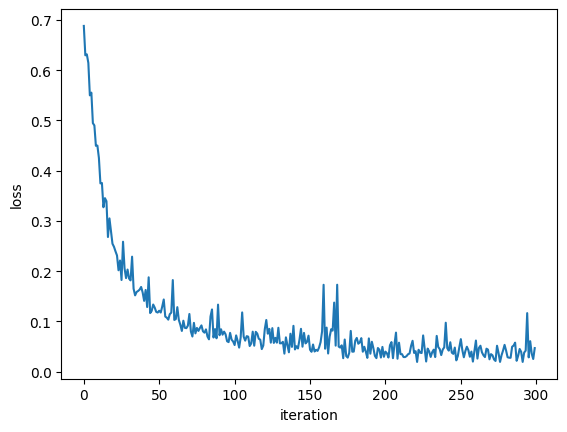

In [ ]:
plt.plot(loss_list)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

In [ ]:
model_path = 'resnet18_trained.pth'
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")

Model saved to resnet18_trained.pth


In [ ]:
misclassified_count = 0

for i, (x_test, y_test) in enumerate(validation_loader):
    outputs = model(x_test)
    _, predicted = torch.max(outputs, 1)

    misclassified_indices = (predicted != y_test).nonzero(as_tuple=False)

    for idx in misclassified_indices:
        print(f"sample {i * len(x_test) + idx.item()} yhat {predicted[idx]}  y {y_test[idx]}")
        misclassified_count += 1

        if misclassified_count == 4:
            break
    if misclassified_count == 4:
        break


<ipython-input-94-5bf0d761ed93>:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  image=torch.load(self.all_files[idx])


sample 32 yhat tensor([0])  y tensor([1])
sample 128 yhat tensor([0])  y tensor([1])
sample 281 yhat tensor([1])  y tensor([0])
sample 350 yhat tensor([0])  y tensor([1])
